In [2]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [4]:
import os
import ccxt
from dotenv import load_dotenv

# Charger les variables d'environnement depuis le fichier .env
load_dotenv()

API_KEY = os.getenv("BINANCE_API_KEY")
API_SECRET = os.getenv("BINANCE_API_SECRET")

# Connexion à Binance
binance = ccxt.binance({
    "apiKey": API_KEY,
    "secret": API_SECRET,
    "enableRateLimit": True
})

# Récupérer le solde
balance = binance.fetch_balance()

print("=== Solde du compte Binance ===")
total_usdt = balance['total'].get('USDT', 0)
print(f"Solde USDT : {total_usdt}")

print("\n=== Cryptos détenues ===")
for asset, info in balance['total'].items():
    if info > 0:
        print(f"{asset}: {info}")


NetworkError: binance GET https://api.binance.com/sapi/v1/capital/config/getall?timestamp=1756988987979&recvWindow=10000&signature=c93eb94493b16c008b44da3a88d0260fdf17384b193b55fca3a1e1e1c6099d33

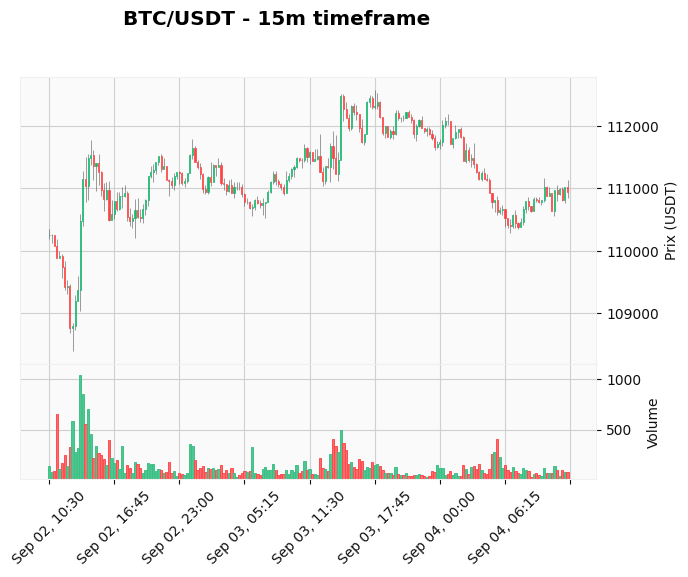

In [1]:
import ccxt
import pandas as pd
import mplfinance as mpf
from dotenv import load_dotenv
import os

# Charger les clés (inutile pour données publiques mais utile si tu veux ton compte)
load_dotenv()
API_KEY = os.getenv("BINANCE_API_KEY")
API_SECRET = os.getenv("BINANCE_API_SECRET")

binance = ccxt.binance({
    "apiKey": API_KEY,
    "secret": API_SECRET,
    "enableRateLimit": True
})


# --- Connexion à Binance ---
binance = ccxt.binance()

# --- Paramètres ---
symbol = "BTC/USDT"
timeframe = "15m"   # "1m", "5m", "15m", "1h", "1d"
limit = 200         # Nombre de bougies à récupérer

# --- Récupération des données OHLCV ---
ohlcv = binance.fetch_ohlcv(symbol, timeframe=timeframe, limit=limit)

# --- Mise en DataFrame ---
df = pd.DataFrame(ohlcv, columns=["timestamp", "open", "high", "low", "close", "volume"])
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
df.set_index("timestamp", inplace=True)

# --- Affichage graphique (bougies japonaises) ---
mpf.plot(
    df,
    type="candle",
    style="yahoo",        # style visuel (tu peux tester "charles", "nightclouds", etc.)
    volume=True,          # affiche le volume
    title=f"{symbol} - {timeframe} timeframe",
    ylabel="Prix (USDT)",
    ylabel_lower="Volume"
)
